In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_min_whole_validation_auc, top_min_dev_auc, read_files, LOGREG_LOG_PARAMETERS

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/logreg.pkl']

In [5]:
top_k = 1000

best_mean_dev = top_mean_dev_auc(read_files(files), top_k)
best_min_dev = top_min_dev_auc(read_files(files), top_k)
true_best = top_min_whole_validation_auc(read_files(files), top_k)

In [6]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'max_overfit_auc',
                   'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [7]:
best_mean_dev[compare_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_dev_auc,1000.0,0.836110,0.000037,0.836057,0.836081,0.836102,0.836134,0.836219
mean_validation_auc,1000.0,0.810336,0.000146,0.810032,0.810231,0.810315,0.810411,0.811023
mean_whole_validation_auc,1000.0,0.811586,0.000085,0.811244,0.811531,0.811585,0.811642,0.811781
max_overfit_auc,1000.0,0.027248,0.000420,0.025853,0.026978,0.027306,0.027563,0.027976
min_dev_auc,1000.0,0.813959,0.000359,0.813307,0.813687,0.813919,0.814212,0.815003
min_validation_auc,1000.0,0.808597,0.000147,0.808263,0.808503,0.808586,0.808694,0.809224
min_whole_validation_auc,1000.0,0.811586,0.000085,0.811244,0.811531,0.811585,0.811642,0.811781


In [8]:
best_mean_dev.min_whole_validation_auc.corr(best_mean_dev.mean_dev_auc, method='spearman')

-0.12032034982554464

In [9]:
best_mean_dev.mean_whole_validation_auc.corr(best_mean_dev.mean_dev_auc, method='spearman')

-0.12032034982554464

In [10]:
best_min_dev[compare_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_dev_auc,1000.0,0.835662,0.000448,0.834323,0.835346,0.835806,0.836047,0.836191
mean_validation_auc,1000.0,0.810269,0.000792,0.808777,0.809756,0.810150,0.810644,0.812553
mean_whole_validation_auc,1000.0,0.811223,0.000599,0.809413,0.810828,0.811337,0.811580,0.812593
max_overfit_auc,1000.0,0.025417,0.000952,0.023813,0.024557,0.025354,0.026332,0.027010
min_dev_auc,1000.0,0.814856,0.000387,0.814244,0.814496,0.814861,0.815202,0.815652
min_validation_auc,1000.0,0.808809,0.000762,0.807328,0.808386,0.808710,0.809082,0.810939
min_whole_validation_auc,1000.0,0.811223,0.000599,0.809413,0.810828,0.811337,0.811580,0.812593


In [11]:
best_min_dev.min_whole_validation_auc.corr(best_min_dev.min_dev_auc, method='spearman')

-0.45593124349744013

In [12]:
best_min_dev.min_whole_validation_auc.corr(best_min_dev.mean_dev_auc, method='spearman')

0.48138662266086496

In [13]:
true_best[compare_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_dev_auc,1000.0,0.835591,0.000650,0.833077,0.835262,0.835956,0.835999,0.836194
mean_validation_auc,1000.0,0.810903,0.000742,0.810186,0.810325,0.810420,0.811549,0.812670
mean_whole_validation_auc,1000.0,0.811908,0.000267,0.811699,0.811738,0.811766,0.812044,0.812859
max_overfit_auc,1000.0,0.026628,0.001150,0.023635,0.025977,0.027308,0.027413,0.027658
min_dev_auc,1000.0,0.813785,0.000587,0.811673,0.813699,0.813796,0.813907,0.815440
min_validation_auc,1000.0,0.809122,0.000780,0.807744,0.808563,0.808630,0.809685,0.811107
min_whole_validation_auc,1000.0,0.811908,0.000267,0.811699,0.811738,0.811766,0.812044,0.812859


In [14]:
true_best.min_whole_validation_auc.corr(true_best.min_dev_auc, method='spearman')

0.026064805559354014

In [15]:
true_best.min_whole_validation_auc.corr(true_best.mean_dev_auc, method='spearman')

-0.7350443609781793

In [16]:
true_best.mean_whole_validation_auc.corr(true_best.min_dev_auc, method='spearman')

0.026064805559354014

In [17]:
true_best.mean_whole_validation_auc.corr(true_best.mean_dev_auc, method='spearman')

-0.7350443609781793

In [18]:
best_mean_dev.merge(true_best, on=['file', 'experiment_id'])\
    .groupby(['file', 'experiment_id']).ngroups

101

In [19]:
best_mean_dev.merge(true_best, on=['file', 'experiment_id']).shape

(101, 136)

In [20]:
best_min_dev.merge(true_best, on=['file', 'experiment_id'])\
    .groupby(['file', 'experiment_id']).ngroups

151

In [21]:
best_min_dev.merge(true_best, on=['file', 'experiment_id']).shape

(151, 136)

In [22]:
best = best_mean_dev

In [23]:
best.shape

(1000, 69)

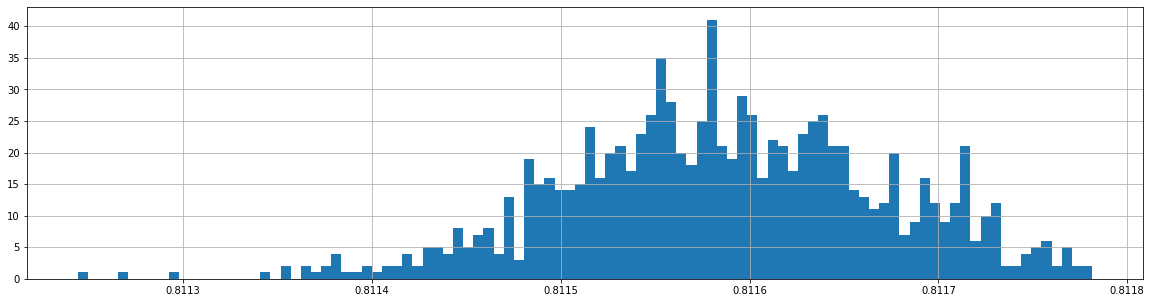

In [24]:
best.min_whole_validation_auc.hist(bins=100);

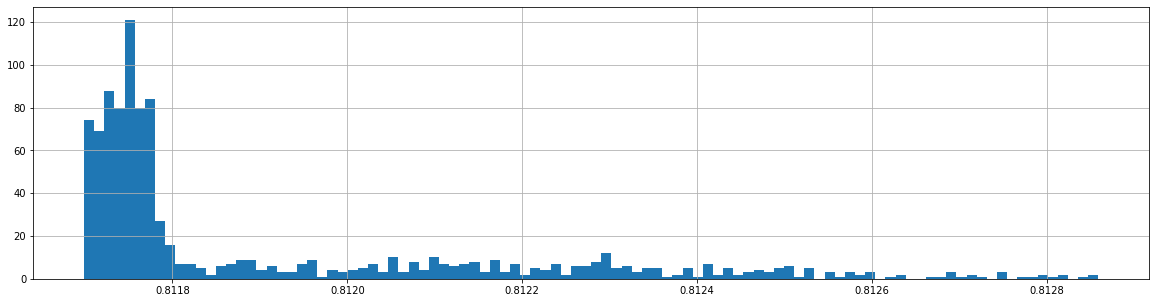

In [25]:
true_best.min_whole_validation_auc.hist(bins=100);

In [26]:
best.groupby('param_clf__fit_intercept').size()

param_clf__fit_intercept
False    479
True     521
dtype: int64

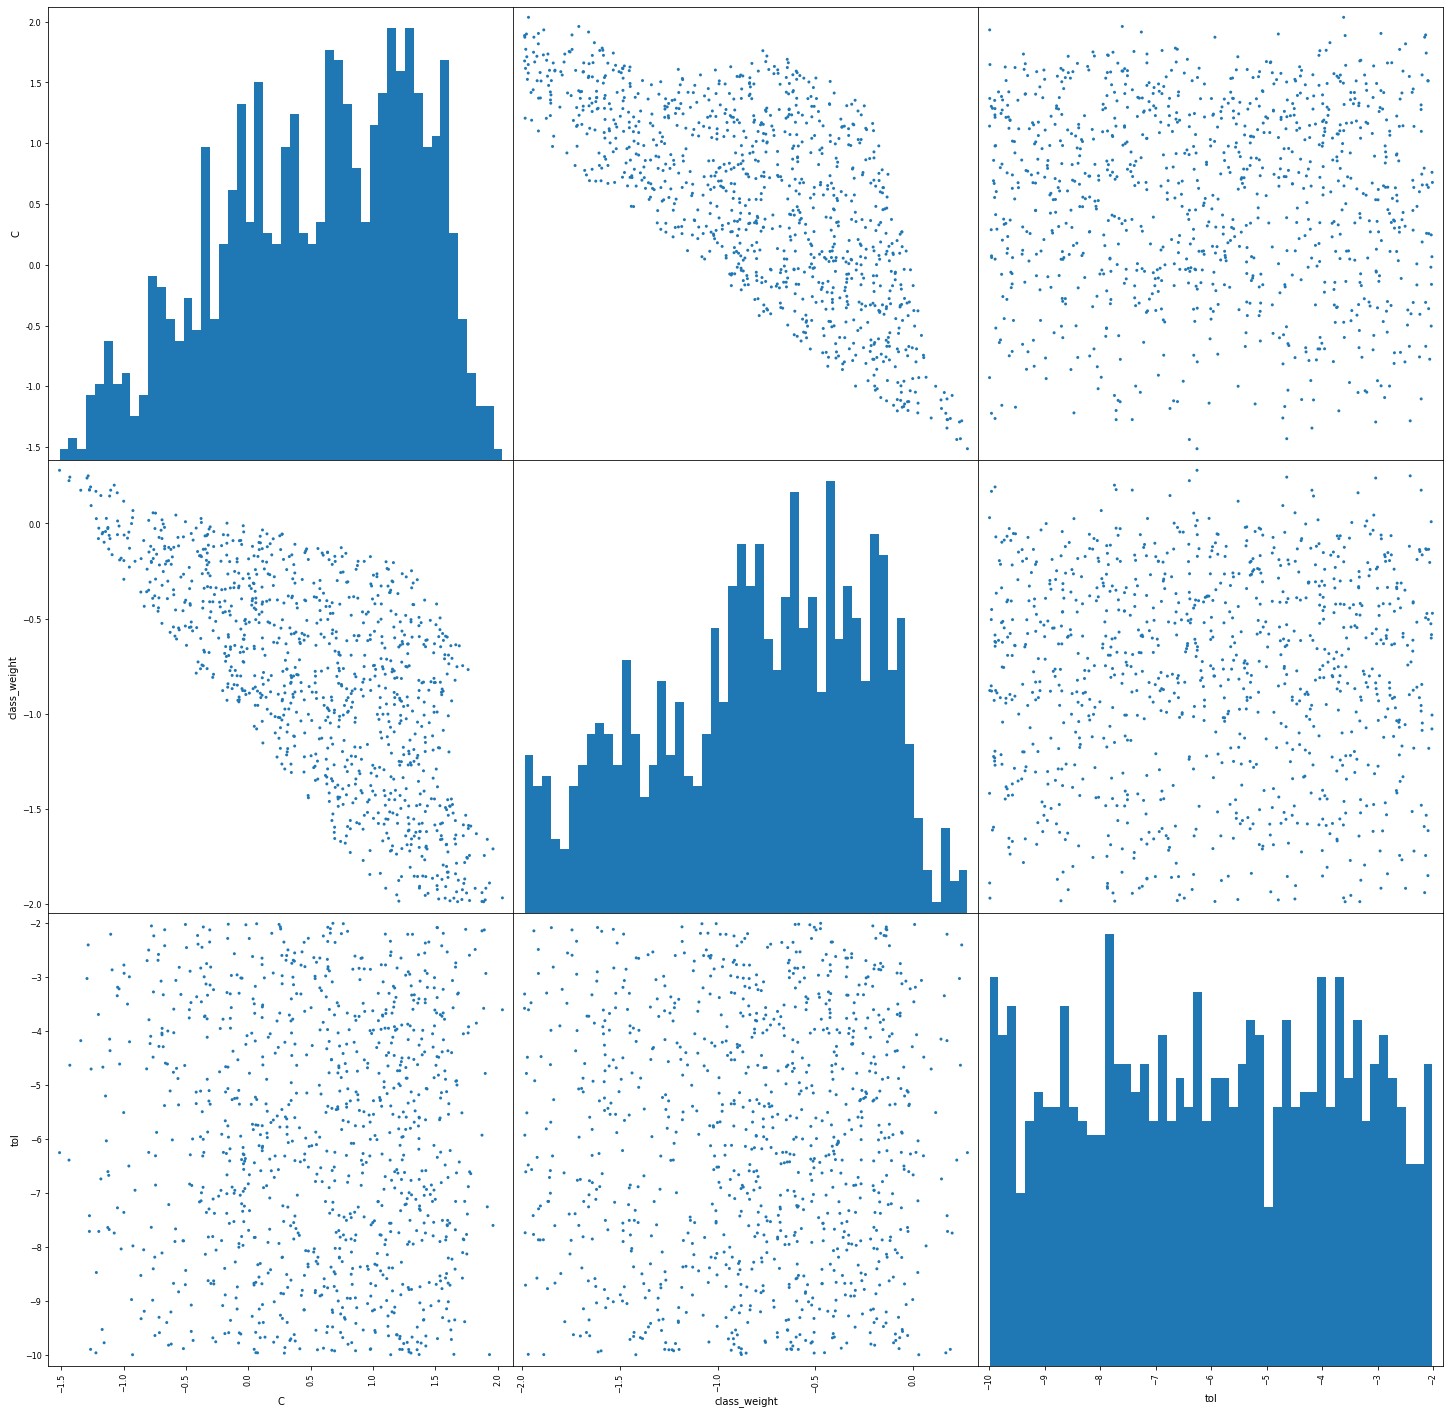

In [27]:
pd.plotting.scatter_matrix(
    pd.concat([np.log10(best[list(set(LOGREG_LOG_PARAMETERS))])],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_clf__', ''), axis='columns').sort_index(axis=1),
    alpha=1, figsize=(25, 25), hist_kwds={'bins': 50});

### top parameters

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(best.sort_values('mean_dev_auc', ascending=False).head().T)

                                                               0  \
cnt                                                            1   
experiment_id                                               7469   
file                                    ./experiments/logreg.pkl   
iteration                                                      1   
max_dev_auc                                             0.852855   
max_dev_binary_error                                    0.801242   
max_dev_binary_logloss                                  0.454033   
max_overfit_auc                                        0.0270509   
max_overfit_binary_error                               0.0137062   
max_overfit_binary_logloss                             0.0215991   
max_validation_auc                                       0.81265   
max_validation_binary_error                             0.789922   
max_validation_binary_logloss                           0.460681   
max_whole_train_auc                             